In [1]:
import networkx as nx
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
myEdgeList = nx.read_edgelist("stdcommnet.edges")
print(len(myEdgeList.nodes()))
list(myEdgeList.edges())[:5]

348


[('0', '1'), ('0', '316'), ('0', '146'), ('0', '221'), ('0', '18')]

In [3]:
data = pd.read_csv("stddepartments.txt", sep = " ")
data.head()

,stdid,label
0,0,MIS
1,1,unknown
2,2,CS
3,3,unknown
4,4,unknown


In [4]:
data.set_index("stdid", inplace=True, drop = True)
data.rename_axis(None, inplace=True)
print(data.shape)
data.head()

(348, 1)


,label
0,MIS
1,unknown
2,CS
3,unknown
4,unknown


In [5]:
data.index

Int64Index([   0,    1,    2,    3,    4,    7,    8,    9,   11,   12,
            ...
             969,  972,  982,  990,  992,  993,  996,  998, 1000, 1001],
           dtype='int64', length=348)

In [6]:
#Features Generated using NetworkX

triangles = nx.triangles(myEdgeList)
pageRank= nx.pagerank(myEdgeList)
eigenvectorCentrality = nx.eigenvector_centrality(myEdgeList)
clustringCoefficient = nx.clustering(myEdgeList)
closenessCentrality = nx.betweenness_centrality(myEdgeList)
betweennessCentrality = nx.betweenness_centrality(myEdgeList)
degreeCentrality = nx.degree_centrality(myEdgeList)

cols = [triangles, pageRank, eigenvectorCentrality,clustringCoefficient, closenessCentrality, betweennessCentrality, degreeCentrality]
names = ["Triangle", "PageRank", "EigenvectorCentrality", "ClusteringCoefficient", "ClosenessCentrality", "BetweennennCentrality", "DegreeCentrality"]
for i in range(len(cols)):
    data[names[i]] = data.index.map({int(k): v for k, v in cols[i].items()})
print(data.shape)
data.head()

(348, 8)


,label,Triangle,PageRank,EigenvectorCentrality,ClusteringCoefficient,ClosenessCentrality,BetweennennCentrality,DegreeCentrality
0,MIS,130,0.003665,0.035426,0.471014,0.004689,0.004689,0.074928
1,unknown,97,0.003522,0.033586,0.383399,0.003313,0.003313,0.072046
2,CS,299,0.006285,0.030224,0.425320,0.024914,0.024914,0.115274
3,unknown,251,0.004688,0.036006,0.539785,0.008720,0.008720,0.095101
4,unknown,308,0.005945,0.037620,0.415655,0.019443,0.019443,0.118156


In [7]:
#Custom Features

centralityDifference = {}
for node in myEdgeList.nodes():
    centralityDifference[node] = degreeCentrality[node] - eigenvectorCentrality[node]

degrees = {node: myEdgeList.degree(node) for node in myEdgeList.nodes()}

meanNumberOfConnections = {}
for node in myEdgeList.nodes():
    neigborConnectionSize = sum(myEdgeList.degree(neighbor) for neighbor in myEdgeList.neighbors(node) if neighbor != node)
    meanNumberOfConnections[node] = neigborConnectionSize / degrees[node]    

cols = [centralityDifference, degrees,meanNumberOfConnections]
names = ["CentralityDifference", "Degrees", "MeanNumberOfConnections"]
        
for i in range(len(cols)):
    data[names[i]] = data.index.map({int(k): v for k, v in cols[i].items()})

print(data.shape)
data.head()

(348, 11)


,label,Triangle,PageRank,EigenvectorCentrality,ClusteringCoefficient,ClosenessCentrality,BetweennennCentrality,DegreeCentrality,CentralityDifference,Degrees,MeanNumberOfConnections
0,MIS,130,0.003665,0.035426,0.471014,0.004689,0.004689,0.074928,0.039502,26,28.576923
1,unknown,97,0.003522,0.033586,0.383399,0.003313,0.003313,0.072046,0.038460,25,30.360000
2,CS,299,0.006285,0.030224,0.425320,0.024914,0.024914,0.115274,0.085050,40,22.150000
3,unknown,251,0.004688,0.036006,0.539785,0.008720,0.008720,0.095101,0.059095,33,28.787879
4,unknown,308,0.005945,0.037620,0.415655,0.019443,0.019443,0.118156,0.080535,41,24.682927


Let's check for the correlations.

<Axes: >

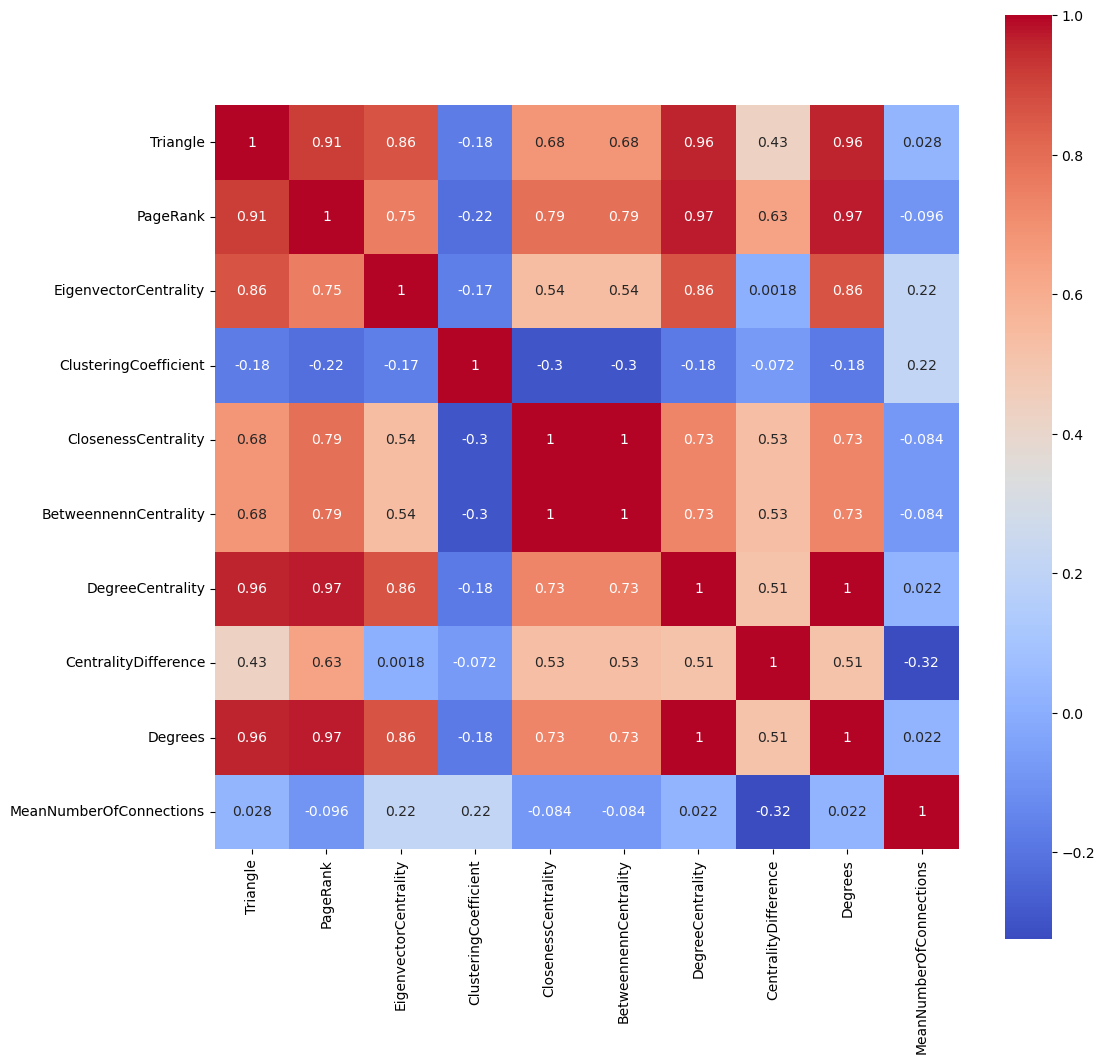

In [8]:
plt.figure(figsize = (12,12))
sns.heatmap(data.iloc[:,1:].corr(), annot=True, square = True, cmap='coolwarm')

I have noticed that there are some highly correlated features. I will drop some of them to enhance the performance of the model that I will tune at a later stage.

- Degrees and DegreesCentrality seem to be exactly the same. I will check for the distribution of the data to decide which one to drop.

- ClosenessCentrality and BetweennessCentrality are identical too. I will drop one of them either.

- Triangle, Pagerank and DegreeCentrality are strongly correlated. I will drop two of them.

In [9]:
data.describe()

,Triangle,PageRank,EigenvectorCentrality,ClusteringCoefficient,ClosenessCentrality,BetweennennCentrality,DegreeCentrality,CentralityDifference,Degrees,MeanNumberOfConnections
count,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,100.577586,0.002874,0.037286,0.485394,0.005278,0.005278,0.055053,0.017767,19.103448,29.992314
std,119.492863,0.001957,0.038569,0.259528,0.011206,0.011206,0.044824,0.022771,15.553966,8.524063
min,0.000000,0.000540,0.000003,0.000000,0.000000,0.000000,0.002882,-0.017777,1.000000,1.000000
25%,6.750000,0.001390,0.008597,0.333333,0.000056,0.000056,0.017291,0.001704,6.000000,26.000000
50%,56.000000,0.002455,0.023331,0.484517,0.000603,0.000603,0.046110,0.011589,16.000000,30.826923
75%,159.500000,0.003899,0.053066,0.651786,0.005193,0.005193,0.080692,0.029387,28.000000,34.598584
max,639.000000,0.011534,0.183682,1.000000,0.091501,0.091501,0.236311,0.099185,82.000000,67.500000


In [10]:
data.drop(["Degrees", "BetweennennCentrality", "Triangle", "DegreeCentrality"], axis = 1, inplace = True)

<Axes: >

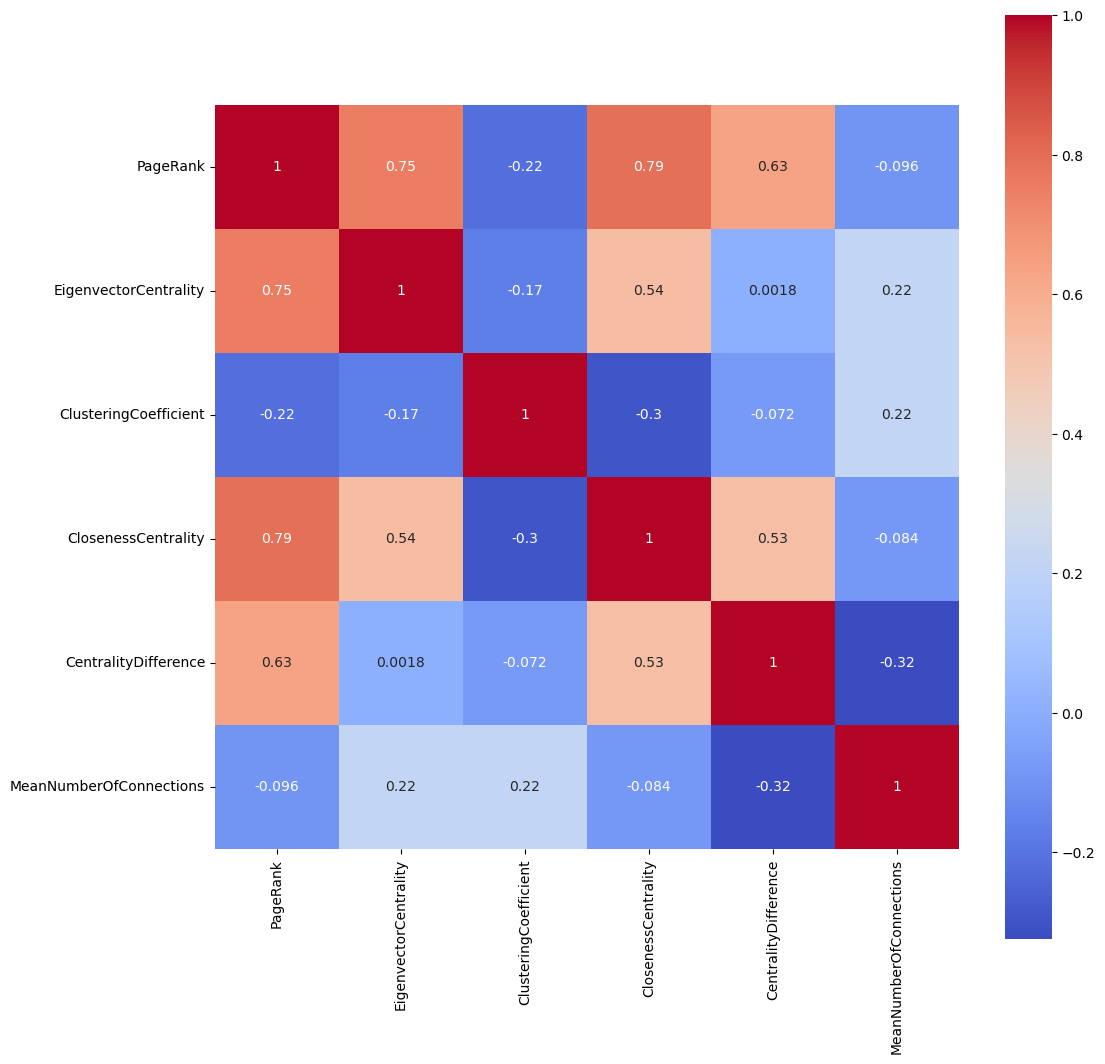

In [11]:
plt.figure(figsize = (12,12))
sns.heatmap(data.iloc[:,1:].corr(), annot=True, square = True, cmap='coolwarm')

Correlation between features looks far better now. Let's check for the distribution of the data.

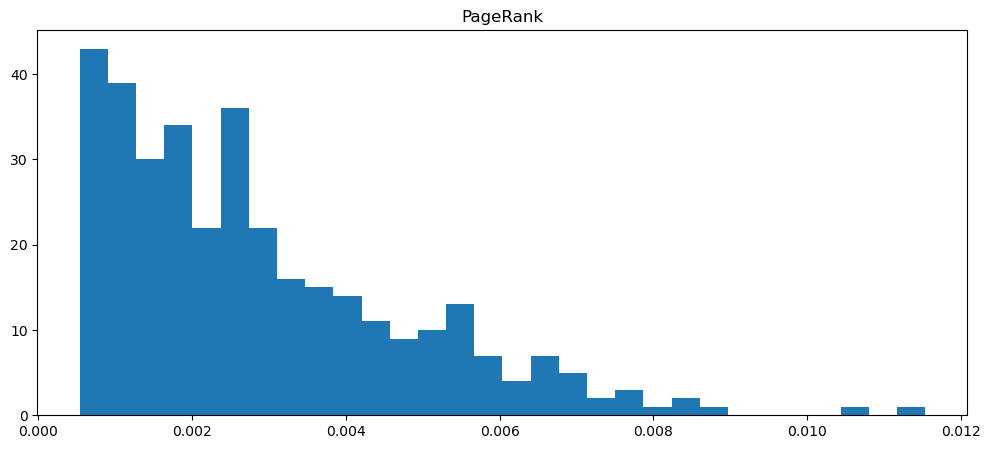

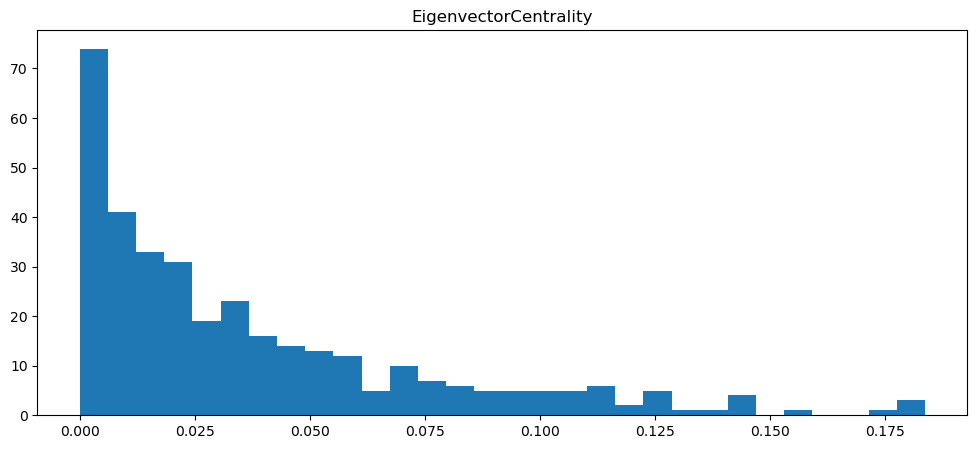

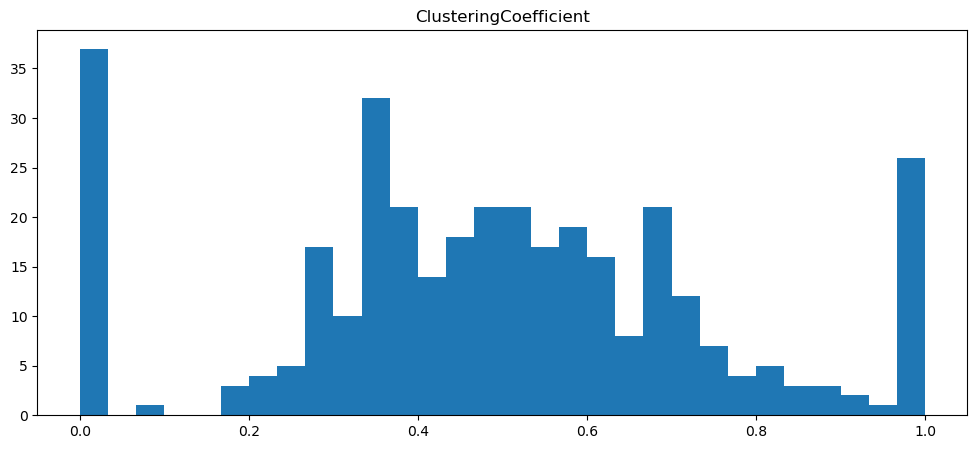

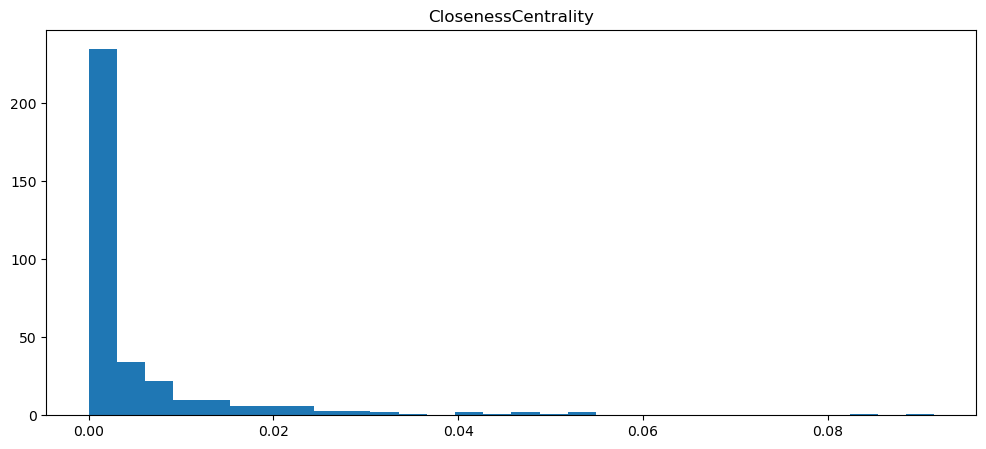

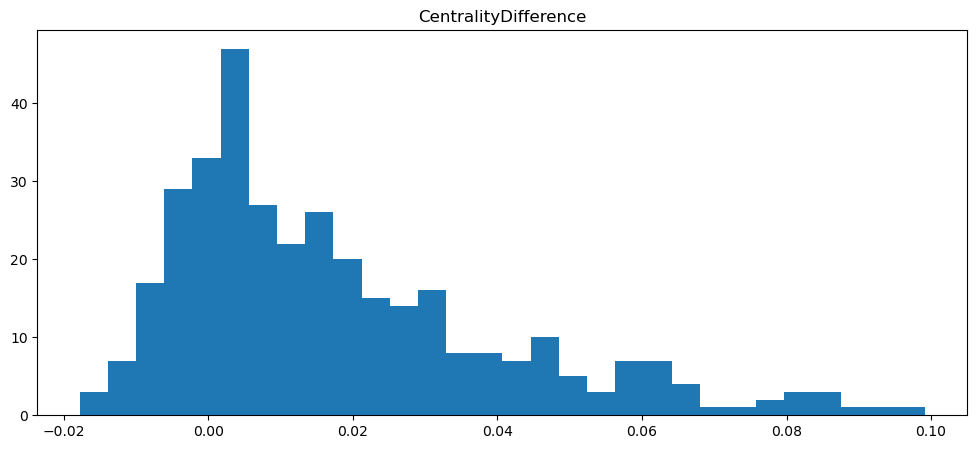

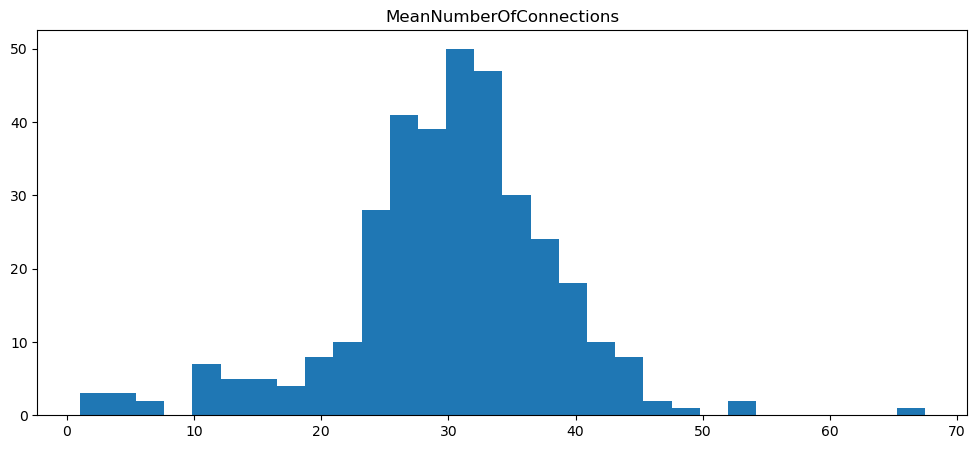

In [12]:
myColumns = data.columns[1:]

for i in myColumns:
    plt.figure(figsize = (12,5))
    plt.hist(data[i], bins = 30)
    plt.title(str(i))
    plt.show()

In [13]:
data.describe()

,PageRank,EigenvectorCentrality,ClusteringCoefficient,ClosenessCentrality,CentralityDifference,MeanNumberOfConnections
count,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,0.002874,0.037286,0.485394,0.005278,0.017767,29.992314
std,0.001957,0.038569,0.259528,0.011206,0.022771,8.524063
min,0.000540,0.000003,0.000000,0.000000,-0.017777,1.000000
25%,0.001390,0.008597,0.333333,0.000056,0.001704,26.000000
50%,0.002455,0.023331,0.484517,0.000603,0.011589,30.826923
75%,0.003899,0.053066,0.651786,0.005193,0.029387,34.598584
max,0.011534,0.183682,1.000000,0.091501,0.099185,67.500000


Scale and shape of the data varies a lot. I am planning to use tree based models for this homework so this will not be a problem.

I might still scale the data using StandardScaler. I will decide later.

In [14]:
from sklearn import preprocessing as pre
from sklearn import compose as com
from sklearn import pipeline as pip
from sklearn import metrics as met

I will try creating a new dataframe containing Node2Vec features.

In [15]:
from sklearn import base
from node2vec import Node2Vec

In [16]:
n2v = Node2Vec(myEdgeList, dimensions=10, num_walks=200, walk_length=30, p=1, q=1)
n2vModel = n2v.fit(window=4, min_count=1, batch_words=4)

n2vDic = dict()
for node in myEdgeList.nodes():
    n2vDic[node] = n2vModel.wv[str(node)]
dfN2v = pd.DataFrame(n2vDic).T
dfN2v.index = pd.to_numeric(dfN2v.index)
dfN2v

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 200/200 [00:10<00:00, 19.34it/s]


,0,1,2,3,4,5,6,7,8,9
0,0.647725,-0.549868,0.385330,0.784622,-0.510680,0.412637,1.246600,0.278664,0.173364,0.674813
1,0.662025,-0.499140,-0.221454,0.811862,-0.145577,0.134952,1.321101,0.295526,-0.603631,0.042976
316,0.715039,-0.540285,-0.105606,1.142340,-0.158074,0.468704,1.637908,0.620827,0.306489,0.444976
146,0.418805,-0.985380,-0.072412,0.283718,0.345255,0.173789,1.702311,-0.279751,0.067270,0.477773
221,0.853522,-0.590712,0.035862,0.504828,-0.397137,-0.026791,1.125145,0.396436,-0.404166,-0.081932
...,...,...,...,...,...,...,...,...,...,...
846,0.188349,-1.463326,2.867637,-0.581271,-0.157904,2.476031,3.295472,-2.973216,0.099200,-0.097193
863,0.319871,-0.386540,1.247294,-1.923870,0.773098,1.384058,1.680620,1.147934,1.009366,0.164845
901,-0.054477,-0.647205,0.688359,-0.947226,1.324296,0.304587,0.945331,0.098142,0.658021,-1.470370
982,0.050174,-0.653731,0.786663,-1.072877,1.322378,0.212710,0.932999,0.133855,0.601199,-1.312776


In [17]:
dfN2v.index

Int64Index([  0,   1, 316, 146, 221,  18, 734, 459, 215,  73,
            ...
            634, 635, 790, 802, 844, 846, 863, 901, 982, 992],
           dtype='int64', length=348)

In [18]:
newDF = pd.merge(data, dfN2v, left_index=True, right_index=True)
newDF

,label,PageRank,EigenvectorCentrality,ClusteringCoefficient,ClosenessCentrality,CentralityDifference,MeanNumberOfConnections,0,1,2,3,4,5,6,7,8,9
0,MIS,0.003665,0.035426,0.471014,0.004689,0.039502,28.576923,0.647725,-0.549868,0.385330,0.784622,-0.510680,0.412637,1.246600,0.278664,0.173364,0.674813
1,unknown,0.003522,0.033586,0.383399,0.003313,0.038460,30.360000,0.662025,-0.499140,-0.221454,0.811862,-0.145577,0.134952,1.321101,0.295526,-0.603631,0.042976
2,CS,0.006285,0.030224,0.425320,0.024914,0.085050,22.150000,0.251722,0.626512,1.173644,-0.892865,0.547541,0.678001,0.872861,0.671017,-0.030255,-0.965849
3,unknown,0.004688,0.036006,0.539785,0.008720,0.059095,28.787879,0.397258,0.198447,0.564016,-0.820741,0.896780,0.645079,0.765785,0.655244,-0.017534,-0.817028
4,unknown,0.005945,0.037620,0.415655,0.019443,0.080535,24.682927,0.139427,0.095314,0.642274,-1.122423,0.763099,0.652181,0.699366,0.869595,-0.212661,-0.700698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,unknown,0.000571,0.000772,0.000000,0.000000,0.002110,35.000000,0.884792,0.741019,0.624090,-0.335367,1.199799,1.307382,1.352786,1.002881,0.681224,-0.858588
996,DA,0.000542,0.004093,0.000000,0.000000,-0.001211,43.000000,-0.605359,-1.687343,1.514147,0.187411,-0.192444,-0.815206,0.397458,0.487102,0.261975,-0.120134
998,DA,0.000564,0.002914,0.000000,0.000000,-0.000032,54.000000,0.293695,-0.278710,0.219303,0.079890,-0.083966,1.412703,-0.026269,0.601267,-1.258546,0.548539
1000,AI,0.000938,0.008943,1.000000,0.000000,0.002585,39.000000,0.712158,-0.900037,0.919124,0.519746,-0.528993,0.907252,-0.034376,-0.780953,-0.921017,-0.260301


The code is running as intended. Now I will work on the RolX features.

In [19]:
from graphrole import RecursiveFeatureExtractor

feat_ext = RecursiveFeatureExtractor(myEdgeList, max_generations=5)
rolx_feats = feat_ext.extract_features()
rolx_feats.index = pd.to_numeric(rolx_feats.index)
rolx_feats

,internal_edges(mean)(mean)(mean)(mean),degree(mean)(mean)(mean),degree(sum)(mean)(mean),external_edges(mean)(mean)(mean),internal_edges(mean)(mean)(mean),degree(mean)(mean),degree(sum)(mean),external_edges(mean)(mean),internal_edges(mean)(mean),degree(mean),degree(sum),external_edges(mean),internal_edges(mean),degree,internal_edges,external_edges
0,224.885818,30.846111,879.480479,467.453871,222.361762,30.083952,878.800000,456.392298,214.264513,30.760000,769.0,449.560000,218.520000,26,172,425
1,221.643083,31.185860,874.958362,474.638366,221.708824,29.697874,916.041667,465.519751,207.415492,32.666667,784.0,467.958333,226.625000,25,139,506
1000,239.776480,32.475009,984.502922,527.127401,240.226554,31.500212,1189.000000,521.823715,233.293288,39.000000,156.0,646.000000,271.500000,4,14,132
1001,236.686822,27.867582,727.170308,292.491488,235.956232,26.936064,664.444444,272.296788,228.236725,25.777778,232.0,230.333333,217.888889,9,49,143
11,285.565813,34.593683,1187.579611,565.500956,289.292080,35.866193,1141.566038,584.745401,304.177173,33.698113,1786.0,582.584906,282.113208,54,541,704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,237.059083,28.382594,739.580545,310.444648,238.135189,26.999260,736.533333,287.120834,227.081645,28.200000,423.0,252.400000,243.000000,15,97,244
992,264.750370,35.374207,1103.206790,518.268973,285.948150,36.064815,1242.500000,496.836420,304.089506,42.500000,85.0,455.500000,393.500000,3,3,79
993,231.002089,28.541203,682.441176,291.990012,242.015789,24.911765,847.000000,271.411765,206.382353,35.000000,35.0,227.000000,310.000000,1,2,32
996,290.290623,35.307140,1201.571429,583.098739,298.940756,35.666667,1498.000000,603.285714,301.595238,43.000000,43.0,704.000000,397.000000,1,2,40


In [20]:
rolx_feats.index

Int64Index([   0,    1, 1000, 1001,   11,   12,  120,  129,  133,  137,
            ...
             967,  968,  969,  972,  982,  990,  992,  993,  996,  998],
           dtype='int64', length=348)

In [21]:
merged_df = newDF.merge(rolx_feats, left_index=True, right_index=True)
merged_df

,label,PageRank,EigenvectorCentrality,ClusteringCoefficient,ClosenessCentrality,CentralityDifference,MeanNumberOfConnections,0,1,2,...,degree(sum)(mean),external_edges(mean)(mean),internal_edges(mean)(mean),degree(mean),degree(sum),external_edges(mean),internal_edges(mean),degree,internal_edges,external_edges
0,MIS,0.003665,0.035426,0.471014,0.004689,0.039502,28.576923,0.647725,-0.549868,0.385330,...,878.800000,456.392298,214.264513,30.760000,769.0,449.560000,218.520000,26,172,425
1,unknown,0.003522,0.033586,0.383399,0.003313,0.038460,30.360000,0.662025,-0.499140,-0.221454,...,916.041667,465.519751,207.415492,32.666667,784.0,467.958333,226.625000,25,139,506
2,CS,0.006285,0.030224,0.425320,0.024914,0.085050,22.150000,0.251722,0.626512,1.173644,...,660.923077,297.715989,246.274005,23.743590,926.0,273.769231,194.487179,40,369,188
3,unknown,0.004688,0.036006,0.539785,0.008720,0.059095,28.787879,0.397258,0.198447,0.564016,...,884.406250,331.350721,243.846323,30.718750,983.0,377.593750,254.218750,33,310,363
4,unknown,0.005945,0.037620,0.415655,0.019443,0.080535,24.682927,0.139427,0.095314,0.642274,...,747.950000,326.372158,249.076085,26.325000,1053.0,325.250000,212.275000,41,380,293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,unknown,0.000571,0.000772,0.000000,0.000000,0.002110,35.000000,0.884792,0.741019,0.624090,...,847.000000,271.411765,206.382353,35.000000,35.0,227.000000,310.000000,1,2,32
996,DA,0.000542,0.004093,0.000000,0.000000,-0.001211,43.000000,-0.605359,-1.687343,1.514147,...,1498.000000,603.285714,301.595238,43.000000,43.0,704.000000,397.000000,1,2,40
998,DA,0.000564,0.002914,0.000000,0.000000,-0.000032,54.000000,0.293695,-0.278710,0.219303,...,1502.000000,490.641509,208.037736,54.000000,54.0,738.000000,382.000000,1,2,51
1000,AI,0.000938,0.008943,1.000000,0.000000,0.002585,39.000000,0.712158,-0.900037,0.919124,...,1189.000000,521.823715,233.293288,39.000000,156.0,646.000000,271.500000,4,14,132


Union works as intended too. Let's prepare the data for hyperparameter tuning.

In [22]:
merged_df.columns = ["Col_"+str(i) for i in range(merged_df.shape[1])]

In [23]:
from sklearn import model_selection as mod
from sklearn import ensemble as ens

In [24]:
merged_df.columns = ["Col_"+str(i) for i in range(merged_df.shape[1])]

dataLabeled = merged_df[merged_df.Col_0 != "unknown"]
dataUnlabeled = merged_df[merged_df.Col_0 == "unknown"].drop("Col_0", axis = 1)

le = pre.LabelEncoder()

X = dataLabeled.drop("Col_0", axis = 1)
y = dataLabeled.Col_0

y_labeled = le.fit_transform(y)
y_labeled

array([4, 1, 2, 2, 2, 2, 0, 4, 4, 2, 2, 2, 0, 1, 1, 1, 1, 1, 0, 3, 3, 3,
       4, 4, 3, 4, 3, 0, 0, 4, 0, 0, 1, 1, 2, 3, 2, 0, 0, 0, 4, 0, 3, 3,
       3, 3, 3, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 0, 2, 4, 2, 0, 2, 2, 2, 2, 0, 0, 0, 1, 1, 3, 0,
       0, 0, 4, 3, 3, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 4, 2, 2, 2,
       2, 2, 0, 0, 0, 2, 2, 1, 1, 0, 4, 4, 3, 0, 2, 0, 0, 2, 0, 2, 4, 0,
       2, 2, 0, 0, 4, 0, 2, 3, 4, 3, 3, 3, 4, 3, 0, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 3, 3, 2, 0, 4, 4, 1, 0, 2, 0, 2, 2, 1, 0, 3, 3, 0,
       0, 3, 3, 2, 0, 2, 0, 0, 2, 2, 0, 0, 2, 1, 0, 2, 0, 0, 3, 0, 0, 1,
       1, 0, 2, 4, 4, 2, 0, 0, 0, 1, 3, 4, 1, 1, 4, 2, 4, 0, 2, 3, 0, 2,
       2, 3, 1, 0, 0, 3, 0, 4, 4, 2, 0, 0, 2, 3, 0, 3, 1, 2, 0, 2, 4, 2,
       3, 0, 2, 1, 4, 2, 3, 3, 0, 0, 0, 4, 3, 0, 1, 2, 2, 0, 1, 0, 3, 0,
       2, 1, 2, 0, 2, 1, 2, 0, 0, 0, 0, 1, 4, 1, 4, 3, 2, 1, 1, 4, 0, 3,
       1, 1, 1, 1, 4, 0, 0, 3, 2, 2, 4, 1, 2, 0, 0,

There are only 348 rows. I will user 33% of the data as test set to prevent overfitting.

In [25]:
X_train, X_test, y_train, y_test = mod.train_test_split(X, y_labeled, test_size=0.33, random_state=42)

In [70]:
X.shape

(318, 42)

Let's create the final pipeline and find the best parameters for a RandomForest model.

In the following part, I will create different dataframes in a loop and merge them to see if the performance of the model changes with different versions of the Node2Vec features. There might be columns containing similar information. Since I wouldn't be able to check for the correlaton of the columns in each iteration, I will drop columns that are highly correlated using feature engine.

In [71]:
from feature_engine import selection as sel

In [26]:
pipeline_RF = pip.Pipeline([
    ("scaler", pre.StandardScaler()),
    ("drop_constant", sel.DropConstantFeatures(tol=0.99)),
    ("drop_duplicate", sel.DropDuplicateFeatures()),
    ("drop_correlated", sel.DropCorrelatedFeatures(threshold=0.90)),
    ("smart_selection", sel.SmartCorrelatedSelection(threshold=0.80, cv=3)),
    ("classifier", ens.RandomForestClassifier())
])

pipeline_RF

Pipeline(steps=[('scaler', StandardScaler()),
                ('drop_constant', DropConstantFeatures(tol=0.99)),
                ('drop_duplicate', DropDuplicateFeatures()),
                ('drop_correlated', DropCorrelatedFeatures(threshold=0.9)),
                ('smart_selection', SmartCorrelatedSelection()),
                ('classifier', RandomForestClassifier())])

In [68]:
param_grid_RF = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 5, 10],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [2, 4],
    'classifier__criterion' : ['gini', 'entropy']
}

grid_search_RF = mod.GridSearchCV(pipeline_RF, 
                                   param_grid_RF, 
                                   cv=5,
                                   verbose=1,
                                   scoring='f1_macro')
grid_search_RF.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('drop_constant',
                                        DropConstantFeatures(tol=0.99)),
                                       ('drop_duplicate',
                                        DropDuplicateFeatures()),
                                       ('drop_correlated',
                                        DropCorrelatedFeatures(threshold=0.9)),
                                       ('smart_selection',
                                        SmartCorrelatedSelection()),
                                       ('classifier',
                                        RandomForestClassifier())]),
             param_grid={'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': [None, 5, 10],
                         'classifier__min_samples_leaf': [2, 4],
                         'classifier__min_samples_split': [2, 5],
                         'classifier__n_estimators': [100, 200]},
             scoring='f1_macro', verbose=1)

In [69]:
print("Best parameters: \n")

for i,j in grid_search_RF.best_params_.items():
    print(i[12:], ":", j)

print("\nBest score: ", grid_search_RF.best_score_)

Best parameters: 

criterion : gini
max_depth : 10
min_samples_leaf : 2
min_samples_split : 2
n_estimators : 100

Best score:  0.968995640676459


Now I will create a similar pipeline for XGBClassifier.

In [29]:
from xgboost import XGBClassifier

pipeline_XGB = pip.Pipeline([
    ("scaler", pre.StandardScaler()),
    ("drop_constant", sel.DropConstantFeatures(tol=0.99)),
    ("drop_duplicate", sel.DropDuplicateFeatures()),
    ("drop_correlated", sel.DropCorrelatedFeatures(threshold=0.90)),
    ("smart_selection", sel.SmartCorrelatedSelection(threshold=0.80, cv=3)),
    ("classifier", XGBClassifier())
])

pipeline_XGB

Pipeline(steps=[('scaler', StandardScaler()),
                ('drop_constant', DropConstantFeatures(tol=0.99)),
                ('drop_duplicate', DropDuplicateFeatures()),
                ('drop_correlated', DropCorrelatedFeatures(threshold=0.9)),
                ('smart_selection', SmartCorrelatedSelection()),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_byno...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [66]:
param_grid_XGB = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [5, 10],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__subsample': [0.5, 0.8, 1],
    'classifier__colsample_bytree': [0.5, 0.8, 1],
    'classifier__gamma': [0, 1, 5],
}

grid_search_XGB = mod.GridSearchCV(pipeline_XGB, 
                                   param_grid_XGB, 
                                   cv=3,
                                   verbose=1,
                                   scoring='f1_macro')
grid_search_XGB.fit(X_train, y_train)

Fitting 3 folds for each of 324 candidates, totalling 972 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('drop_constant',
                                        DropConstantFeatures(tol=0.99)),
                                       ('drop_duplicate',
                                        DropDuplicateFeatures()),
                                       ('drop_correlated',
                                        DropCorrelatedFeatures(threshold=0.9)),
                                       ('smart_selection',
                                        SmartCorrelatedSelection()),
                                       ('classifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample...
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None, ...))]),
             param_grid={'classifier__colsample_bytree': [0.5, 0.8, 1],
                         'classifier__gamma': [0, 1, 5],
                         'classifier__learning_rate': [0.01, 0.1, 0.2],
                         'classifier__max_depth': [5, 10],
                         'classifier__n_estimators': [100, 200],
                         'classifier__subsample': [0.5, 0.8, 1]},
             scoring='f1_macro', verbose=1)

In [67]:
print("Best parameters: \n")

for i,j in grid_search_XGB.best_params_.items():
    print(i[12:], ":", j)

print("\nBest score: ", grid_search_XGB.best_score_)

Best parameters: 

colsample_bytree : 0.5
gamma : 0
learning_rate : 0.1
max_depth : 5
n_estimators : 100
subsample : 0.5

Best score:  0.9607464592361618


Both RandomForestClassifier and XGBClassifier seem to work fine. I will try to tune Node2Vec parameters using both of them. I will start with RandomForestClassifier.

In this section, I will merge dataframes created using rolX features and Node2Vec features with the features I have created in a loop and measure the perormance of both models.

In [51]:
import itertools
from tqdm import tqdm

param_grid_RF = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [5, 10],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [2, 4],
    'classifier__criterion' : ['gini', 'entropy']
}

grid_search_RF = mod.GridSearchCV(pipeline_RF, 
                                   param_grid_RF, 
                                   cv=5,
                                   verbose=1,
                                   scoring='f1_macro')

bestScoreTest = 0
bestScoreGrid = 0
bestParamsModel = {}
bestParamsN2V = ""
dataUnlabeledFinal = pd.DataFrame()

#Here are the parameters that I will tuneusing Node2Vec.
dimensionsList = [15, 20]
walkLengthList = [40, 50]
numWalksList = [150, 250]
workersList = [5,6]
pList = [0.5, 0.7]
qList = [2,3]

#I will create combinations of these parameters without changing the order of themn.
combinations = list(itertools.product(dimensionsList, walkLengthList, numWalksList, workersList, pList, qList))

#Now I will try each combination to create a different Node2Vec dataframe.
for i, j, k, w, p, q in tqdm(combinations):
    n2v = Node2Vec(myEdgeList, dimensions=i, walk_length=j, num_walks=k, workers=w, p = p, q = q)
    n2vModel = n2v.fit(window=4, min_count=1, batch_words=4)

    n2vDic = dict()
    for node in myEdgeList.nodes():
        n2vDic[node] = n2vModel.wv[str(node)]
    dfN2v = pd.DataFrame(n2vDic).T
    dfN2v.index = pd.to_numeric(dfN2v.index)
    newDF = pd.merge(data, dfN2v, left_index=True, right_index=True)
    merged_df = newDF.merge(rolx_feats, left_index=True, right_index=True)

    merged_df.columns = ["Col_"+str(i) for i in range(merged_df.shape[1])]

    dataLabeled = merged_df[merged_df.Col_0 != "unknown"]
    dataUnlabeled = merged_df[merged_df.Col_0 == "unknown"].drop("Col_0", axis = 1)

    le = pre.LabelEncoder()

    X = dataLabeled.drop("Col_0", axis = 1)
    y = dataLabeled.Col_0

    y_labeled = le.fit_transform(y)

    X_train, X_test, y_train, y_test = mod.train_test_split(X, y_labeled, test_size=0.33, random_state=42)

    grid_search_RF.fit(X_train, y_train)

    y_pred = grid_search_RF.predict(X_test)
    score = met.f1_score(y_test, y_pred, average="macro")

    #I will keep the information of the best performing combination to predict later on.
    if score > bestScoreTest:
        bestScoreTest = score
        bestScoreGrid = grid_search_RF.best_score_
        bestParamsModel = grid_search_RF.best_params_
        dataUnlabeledFinal = dataUnlabeled
        bestParamsN2V = (f"\ndimensions={i}, walk_length={j}, num_walks={k}, workers={w}, p={p}, q={q}\n")

  0%|                                                                                           | 0/64 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 5 folds for each of 32 candidates, totalling 160 fits


  2%|█▎                                                                               | 1/64 [01:09<1:12:59, 69.51s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 5 folds for each of 32 candidates, totalling 160 fits


  3%|██▌                                                                              | 2/64 [02:19<1:12:20, 70.02s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 5 folds for each of 32 candidates, totalling 160 fits


  5%|███▊                                                                             | 3/64 [03:31<1:12:03, 70.87s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 5 folds for each of 32 candidates, totalling 160 fits


  6%|█████                                                                            | 4/64 [04:42<1:10:49, 70.83s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 5 folds for each of 32 candidates, totalling 160 fits


  8%|██████▎                                                                          | 5/64 [05:57<1:11:10, 72.39s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 5 folds for each of 32 candidates, totalling 160 fits


  9%|███████▌                                                                         | 6/64 [07:11<1:10:17, 72.72s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 5 folds for each of 32 candidates, totalling 160 fits


 11%|████████▊                                                                        | 7/64 [08:23<1:09:02, 72.67s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 5 folds for each of 32 candidates, totalling 160 fits


 12%|██████████▏                                                                      | 8/64 [09:36<1:07:59, 72.85s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 5 folds for each of 32 candidates, totalling 160 fits


 14%|███████████▍                                                                     | 9/64 [11:04<1:11:07, 77.60s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 5 folds for each of 32 candidates, totalling 160 fits


 16%|████████████▌                                                                   | 10/64 [12:32<1:12:44, 80.83s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 5 folds for each of 32 candidates, totalling 160 fits


 17%|█████████████▊                                                                  | 11/64 [14:01<1:13:26, 83.13s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 5 folds for each of 32 candidates, totalling 160 fits


 19%|███████████████                                                                 | 12/64 [15:29<1:13:29, 84.80s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 5 folds for each of 32 candidates, totalling 160 fits


 20%|████████████████▎                                                               | 13/64 [17:05<1:14:49, 88.02s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 5 folds for each of 32 candidates, totalling 160 fits


 22%|█████████████████▌                                                              | 14/64 [18:40<1:15:13, 90.27s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 5 folds for each of 32 candidates, totalling 160 fits


 23%|██████████████████▊                                                             | 15/64 [20:15<1:14:54, 91.72s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 5 folds for each of 32 candidates, totalling 160 fits


 25%|████████████████████                                                            | 16/64 [21:51<1:14:22, 92.96s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 5 folds for each of 32 candidates, totalling 160 fits


 27%|█████████████████████▎                                                          | 17/64 [23:01<1:07:21, 85.99s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 5 folds for each of 32 candidates, totalling 160 fits


 28%|██████████████████████▌                                                         | 18/64 [24:14<1:02:49, 81.95s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 5 folds for each of 32 candidates, totalling 160 fits


 30%|████████████████████████▎                                                         | 19/64 [25:25<59:09, 78.88s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 5 folds for each of 32 candidates, totalling 160 fits


 31%|█████████████████████████▋                                                        | 20/64 [26:44<57:46, 78.78s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 5 folds for each of 32 candidates, totalling 160 fits


 33%|██████████████████████████▉                                                       | 21/64 [28:04<56:46, 79.22s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 5 folds for each of 32 candidates, totalling 160 fits


 34%|████████████████████████████▏                                                     | 22/64 [29:24<55:41, 79.55s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 5 folds for each of 32 candidates, totalling 160 fits


 36%|█████████████████████████████▍                                                    | 23/64 [30:42<53:58, 79.00s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 5 folds for each of 32 candidates, totalling 160 fits


 38%|██████████████████████████████▊                                                   | 24/64 [32:06<53:36, 80.40s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 5 folds for each of 32 candidates, totalling 160 fits


 39%|████████████████████████████████                                                  | 25/64 [33:41<55:08, 84.83s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 5 folds for each of 32 candidates, totalling 160 fits


 41%|█████████████████████████████████▎                                                | 26/64 [35:11<54:40, 86.33s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 5 folds for each of 32 candidates, totalling 160 fits


 42%|██████████████████████████████████▌                                               | 27/64 [36:42<54:11, 87.88s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 5 folds for each of 32 candidates, totalling 160 fits


 44%|███████████████████████████████████▉                                              | 28/64 [38:15<53:31, 89.20s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 5 folds for each of 32 candidates, totalling 160 fits


 45%|█████████████████████████████████████▏                                            | 29/64 [39:53<53:41, 92.04s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 5 folds for each of 32 candidates, totalling 160 fits


 47%|██████████████████████████████████████▍                                           | 30/64 [41:32<53:21, 94.16s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 5 folds for each of 32 candidates, totalling 160 fits


 48%|███████████████████████████████████████▋                                          | 31/64 [43:10<52:24, 95.28s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 5 folds for each of 32 candidates, totalling 160 fits


 50%|█████████████████████████████████████████                                         | 32/64 [44:48<51:16, 96.14s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 5 folds for each of 32 candidates, totalling 160 fits


 52%|██████████████████████████████████████████▎                                       | 33/64 [46:03<46:18, 89.62s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 5 folds for each of 32 candidates, totalling 160 fits


 53%|███████████████████████████████████████████▌                                      | 34/64 [47:18<42:38, 85.30s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 5 folds for each of 32 candidates, totalling 160 fits


 55%|████████████████████████████████████████████▊                                     | 35/64 [48:33<39:41, 82.12s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 5 folds for each of 32 candidates, totalling 160 fits


 56%|██████████████████████████████████████████████▏                                   | 36/64 [49:49<37:30, 80.36s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 5 folds for each of 32 candidates, totalling 160 fits


 58%|███████████████████████████████████████████████▍                                  | 37/64 [51:09<36:07, 80.30s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 5 folds for each of 32 candidates, totalling 160 fits


 59%|████████████████████████████████████████████████▋                                 | 38/64 [52:29<34:42, 80.10s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 5 folds for each of 32 candidates, totalling 160 fits


 61%|█████████████████████████████████████████████████▉                                | 39/64 [53:49<33:25, 80.21s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 5 folds for each of 32 candidates, totalling 160 fits


 62%|███████████████████████████████████████████████████▎                              | 40/64 [55:09<31:58, 79.93s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 5 folds for each of 32 candidates, totalling 160 fits


 64%|████████████████████████████████████████████████████▌                             | 41/64 [56:56<33:48, 88.20s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 5 folds for each of 32 candidates, totalling 160 fits


 66%|█████████████████████████████████████████████████████▊                            | 42/64 [58:31<33:02, 90.10s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 5 folds for each of 32 candidates, totalling 160 fits


 67%|█████████████████████████████████████████████████████▊                          | 43/64 [1:00:03<31:44, 90.69s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 5 folds for each of 32 candidates, totalling 160 fits


 69%|███████████████████████████████████████████████████████                         | 44/64 [1:01:37<30:34, 91.74s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 5 folds for each of 32 candidates, totalling 160 fits


 70%|████████████████████████████████████████████████████████▎                       | 45/64 [1:03:29<30:58, 97.83s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 5 folds for each of 32 candidates, totalling 160 fits


 72%|█████████████████████████████████████████████████████████▌                      | 46/64 [1:05:12<29:50, 99.48s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 5 folds for each of 32 candidates, totalling 160 fits


 73%|██████████████████████████████████████████████████████████                     | 47/64 [1:06:54<28:22, 100.17s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 5 folds for each of 32 candidates, totalling 160 fits


 75%|███████████████████████████████████████████████████████████▎                   | 48/64 [1:08:36<26:50, 100.67s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 5 folds for each of 32 candidates, totalling 160 fits


 77%|█████████████████████████████████████████████████████████████▎                  | 49/64 [1:09:49<23:07, 92.50s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 5 folds for each of 32 candidates, totalling 160 fits


 78%|██████████████████████████████████████████████████████████████▌                 | 50/64 [1:11:09<20:42, 88.76s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 5 folds for each of 32 candidates, totalling 160 fits


 80%|███████████████████████████████████████████████████████████████▊                | 51/64 [1:12:31<18:48, 86.78s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 5 folds for each of 32 candidates, totalling 160 fits


 81%|█████████████████████████████████████████████████████████████████               | 52/64 [1:13:53<17:02, 85.18s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 5 folds for each of 32 candidates, totalling 160 fits


 83%|██████████████████████████████████████████████████████████████████▎             | 53/64 [1:15:16<15:30, 84.59s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 5 folds for each of 32 candidates, totalling 160 fits


 84%|███████████████████████████████████████████████████████████████████▌            | 54/64 [1:16:34<13:45, 82.60s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 5 folds for each of 32 candidates, totalling 160 fits


 86%|████████████████████████████████████████████████████████████████████▊           | 55/64 [1:17:50<12:06, 80.73s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 5 folds for each of 32 candidates, totalling 160 fits


 88%|██████████████████████████████████████████████████████████████████████          | 56/64 [1:19:07<10:35, 79.42s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 5 folds for each of 32 candidates, totalling 160 fits


 89%|███████████████████████████████████████████████████████████████████████▎        | 57/64 [1:20:40<09:44, 83.50s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 5 folds for each of 32 candidates, totalling 160 fits


 91%|████████████████████████████████████████████████████████████████████████▌       | 58/64 [1:22:12<08:36, 86.14s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 5 folds for each of 32 candidates, totalling 160 fits


 92%|█████████████████████████████████████████████████████████████████████████▊      | 59/64 [1:23:45<07:21, 88.25s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 5 folds for each of 32 candidates, totalling 160 fits


 94%|███████████████████████████████████████████████████████████████████████████     | 60/64 [1:25:18<05:57, 89.49s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 5 folds for each of 32 candidates, totalling 160 fits


 95%|████████████████████████████████████████████████████████████████████████████▎   | 61/64 [1:26:58<04:37, 92.66s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 5 folds for each of 32 candidates, totalling 160 fits


 97%|█████████████████████████████████████████████████████████████████████████████▌  | 62/64 [1:28:37<03:09, 94.57s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 5 folds for each of 32 candidates, totalling 160 fits


 98%|██████████████████████████████████████████████████████████████████████████████▊ | 63/64 [1:30:16<01:36, 96.01s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 5 folds for each of 32 candidates, totalling 160 fits


100%|████████████████████████████████████████████████████████████████████████████████| 64/64 [1:31:57<00:00, 86.21s/it]


In [52]:
print("Best parameters of the model: ")
for i,j in bestParamsModel.items():
    print(i[12:], ":", j)
print("\n")
print("Best parameters of the N2W: ", bestParamsN2V)
print("Best score from the grid: ", bestScoreGrid)
print("\nF1 Score of the test predictions: ", bestScoreTest)

Best parameters of the model: 
criterion : entropy
max_depth : 5
min_samples_leaf : 2
min_samples_split : 5
n_estimators : 100


Best parameters of the N2W:  
dimensions=20, walk_length=40, num_walks=150, workers=6, p=0.5, q=2

Best score from the grid:  0.9665425633190339

F1 Score of the test predictions:  0.9778363343580736


Exporting the results of the Random Forest Model.

In [53]:
data_unknown_RF = data[data.label == "unknown"].drop("label", axis = 1)
data_unknown_RF["label"] = le.inverse_transform(grid_search_RF.predict(dataUnlabeledFinal))
data_unknown_RF = data_unknown_RF[["label"]]

In [54]:
data_unknown_RF.to_csv('predictions_RF.txt', index_label="stdid", sep=' ')

I will try to tune Node2Vec parameters using XGBClassifier too.

In [55]:
param_grid_XGB = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [5, 10],
    'classifier__learning_rate': [0.01, 0.1],
    'classifier__subsample': [0.5, 1],
    'classifier__colsample_bytree': [0.5, 1],
    'classifier__gamma': [0, 3],
}

grid_search_XGB = mod.GridSearchCV(pipeline_XGB, 
                                   param_grid_XGB, 
                                   cv=3,
                                   verbose=1,
                                   scoring='f1_macro')

bestScoreTest_XGB = 0
bestScoreGrid_XGB = 0
bestParamsModel_XGB = {}
bestParamsN2V_XGB = ""
dataUnlabeledFinal_XGB = pd.DataFrame()
dimensionsList = [15, 20]
walkLengthList = [40, 50]
numWalksList = [150, 250]
workersList = [5,6]
pList = [0.5, 0.7]
qList = [2,3]

combinations = list(itertools.product(dimensionsList, walkLengthList, numWalksList, workersList, pList, qList))

for i, j, k, w, p, q in tqdm(combinations):
    n2v = Node2Vec(myEdgeList, dimensions=i, walk_length=j, num_walks=k, workers=w, p = p, q = q)
    n2vModel = n2v.fit(window=4, min_count=1, batch_words=4)

    n2vDic = dict()
    for node in myEdgeList.nodes():
        n2vDic[node] = n2vModel.wv[str(node)]
    dfN2v = pd.DataFrame(n2vDic).T
    dfN2v.index = pd.to_numeric(dfN2v.index)
    newDF = pd.merge(data, dfN2v, left_index=True, right_index=True)
    merged_df = newDF.merge(rolx_feats, left_index=True, right_index=True)

    merged_df.columns = ["Col_"+str(i) for i in range(merged_df.shape[1])]

    dataLabeled = merged_df[merged_df.Col_0 != "unknown"]
    dataUnlabeled = merged_df[merged_df.Col_0 == "unknown"].drop("Col_0", axis = 1)

    le = pre.LabelEncoder()

    X = dataLabeled.drop("Col_0", axis = 1)
    y = dataLabeled.Col_0

    y_labeled = le.fit_transform(y)

    X_train, X_test, y_train, y_test = mod.train_test_split(X, y_labeled, test_size=0.33, random_state=42)

    grid_search_XGB.fit(X_train, y_train)

    y_pred = grid_search_XGB.predict(X_test)
    score = met.f1_score(y_test, y_pred, average="macro")

    if score > bestScoreTest_XGB:
        bestScoreTest_XGB = score
        bestScoreGrid_XGB = grid_search_XGB.best_score_
        bestParamsModel_XGB = grid_search_XGB.best_params_
        dataUnlabeledFinal_XGB = dataUnlabeled
        bestParamsN2V_XGB = (f"\ndimensions={i}, walk_length={j}, num_walks={k}, workers={w}, p={p}, q={q}\n")

  0%|                                                                                           | 0/64 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 3 folds for each of 64 candidates, totalling 192 fits


  2%|█▎                                                                               | 1/64 [01:25<1:29:34, 85.30s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 3 folds for each of 64 candidates, totalling 192 fits


  3%|██▌                                                                              | 2/64 [02:48<1:26:47, 83.99s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 3 folds for each of 64 candidates, totalling 192 fits


  5%|███▊                                                                             | 3/64 [04:11<1:24:48, 83.43s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 3 folds for each of 64 candidates, totalling 192 fits


  6%|█████                                                                            | 4/64 [05:32<1:22:43, 82.73s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 3 folds for each of 64 candidates, totalling 192 fits


  8%|██████▎                                                                          | 5/64 [07:01<1:23:23, 84.81s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 3 folds for each of 64 candidates, totalling 192 fits


  9%|███████▌                                                                         | 6/64 [08:30<1:23:23, 86.27s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 3 folds for each of 64 candidates, totalling 192 fits


 11%|████████▊                                                                        | 7/64 [09:58<1:22:40, 87.03s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 3 folds for each of 64 candidates, totalling 192 fits


 12%|██████████▏                                                                      | 8/64 [11:27<1:21:42, 87.55s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 3 folds for each of 64 candidates, totalling 192 fits


 14%|███████████▍                                                                     | 9/64 [13:10<1:24:45, 92.46s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 3 folds for each of 64 candidates, totalling 192 fits


 16%|████████████▌                                                                   | 10/64 [14:55<1:26:27, 96.07s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 3 folds for each of 64 candidates, totalling 192 fits


 17%|█████████████▊                                                                  | 11/64 [16:37<1:26:33, 97.98s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 3 folds for each of 64 candidates, totalling 192 fits


 19%|███████████████                                                                 | 12/64 [18:18<1:25:48, 99.01s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 3 folds for each of 64 candidates, totalling 192 fits


 20%|████████████████                                                               | 13/64 [20:10<1:27:25, 102.85s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 3 folds for each of 64 candidates, totalling 192 fits


 22%|█████████████████▎                                                             | 14/64 [22:01<1:27:49, 105.40s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 3 folds for each of 64 candidates, totalling 192 fits


 23%|██████████████████▌                                                            | 15/64 [23:52<1:27:18, 106.90s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 3 folds for each of 64 candidates, totalling 192 fits


 25%|███████████████████▊                                                           | 16/64 [25:42<1:26:28, 108.10s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 3 folds for each of 64 candidates, totalling 192 fits


 27%|████████████████████▉                                                          | 17/64 [27:06<1:18:55, 100.76s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 3 folds for each of 64 candidates, totalling 192 fits


 28%|██████████████████████▌                                                         | 18/64 [28:29<1:13:13, 95.50s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 3 folds for each of 64 candidates, totalling 192 fits


 30%|███████████████████████▊                                                        | 19/64 [29:53<1:09:00, 92.01s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 3 folds for each of 64 candidates, totalling 192 fits


 31%|█████████████████████████                                                       | 20/64 [31:19<1:06:05, 90.13s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 3 folds for each of 64 candidates, totalling 192 fits


 33%|██████████████████████████▎                                                     | 21/64 [32:48<1:04:23, 89.85s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 3 folds for each of 64 candidates, totalling 192 fits


 34%|███████████████████████████▌                                                    | 22/64 [34:16<1:02:30, 89.30s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 3 folds for each of 64 candidates, totalling 192 fits


 36%|████████████████████████████▊                                                   | 23/64 [35:44<1:00:40, 88.79s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 3 folds for each of 64 candidates, totalling 192 fits


 38%|██████████████████████████████▊                                                   | 24/64 [37:13<59:12, 88.81s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 3 folds for each of 64 candidates, totalling 192 fits


 39%|███████████████████████████████▎                                                | 25/64 [38:55<1:00:17, 92.76s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 3 folds for each of 64 candidates, totalling 192 fits


 41%|████████████████████████████████▌                                               | 26/64 [40:37<1:00:33, 95.62s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 3 folds for each of 64 candidates, totalling 192 fits


 42%|██████████████████████████████████▌                                               | 27/64 [42:17<59:46, 96.92s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 3 folds for each of 64 candidates, totalling 192 fits


 44%|███████████████████████████████████▉                                              | 28/64 [43:59<59:03, 98.42s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 3 folds for each of 64 candidates, totalling 192 fits


 45%|████████████████████████████████████▋                                            | 29/64 [45:49<59:31, 102.04s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 3 folds for each of 64 candidates, totalling 192 fits


 47%|█████████████████████████████████████▉                                           | 30/64 [47:39<59:06, 104.32s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 3 folds for each of 64 candidates, totalling 192 fits


 48%|███████████████████████████████████████▏                                         | 31/64 [49:28<58:10, 105.77s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 3 folds for each of 64 candidates, totalling 192 fits


 50%|████████████████████████████████████████▌                                        | 32/64 [51:18<57:02, 106.95s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 3 folds for each of 64 candidates, totalling 192 fits


 52%|█████████████████████████████████████████▊                                       | 33/64 [52:44<51:59, 100.64s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 3 folds for each of 64 candidates, totalling 192 fits


 53%|███████████████████████████████████████▊                                   | 34/64 [3:11:51<21:27:17, 2574.57s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

C:\Users\duruh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Fitting 3 folds for each of 64 candidates, totalling 192 fits


 55%|█████████████████████████████████████████                                  | 35/64 [3:13:22<14:44:19, 1829.62s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 3 folds for each of 64 candidates, totalling 192 fits


 56%|██████████████████████████████████████████▏                                | 36/64 [3:14:50<10:09:59, 1307.13s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 3 folds for each of 64 candidates, totalling 192 fits


 58%|████████████████████████████████████████████▌                                | 37/64 [3:16:22<7:04:04, 942.38s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 3 folds for each of 64 candidates, totalling 192 fits


 59%|█████████████████████████████████████████████▋                               | 38/64 [3:17:53<4:57:45, 687.15s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 3 folds for each of 64 candidates, totalling 192 fits


 61%|██████████████████████████████████████████████▉                              | 39/64 [3:19:25<3:31:53, 508.54s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 3 folds for each of 64 candidates, totalling 192 fits


 62%|████████████████████████████████████████████████▏                            | 40/64 [3:20:55<2:33:14, 383.11s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 3 folds for each of 64 candidates, totalling 192 fits


 64%|█████████████████████████████████████████████████▎                           | 41/64 [3:22:42<1:55:02, 300.12s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 3 folds for each of 64 candidates, totalling 192 fits


 66%|██████████████████████████████████████████████████▌                          | 42/64 [3:24:29<1:28:47, 242.15s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 3 folds for each of 64 candidates, totalling 192 fits


 67%|███████████████████████████████████████████████████▋                         | 43/64 [3:26:14<1:10:25, 201.24s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 3 folds for each of 64 candidates, totalling 192 fits


 69%|██████████████████████████████████████████████████████▎                        | 44/64 [3:28:01<57:34, 172.71s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 3 folds for each of 64 candidates, totalling 192 fits


 70%|███████████████████████████████████████████████████████▌                       | 45/64 [3:29:55<49:11, 155.33s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 3 folds for each of 64 candidates, totalling 192 fits


 72%|████████████████████████████████████████████████████████▊                      | 46/64 [3:32:02<44:03, 146.84s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 3 folds for each of 64 candidates, totalling 192 fits


 73%|██████████████████████████████████████████████████████████                     | 47/64 [3:34:01<39:14, 138.50s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 3 folds for each of 64 candidates, totalling 192 fits


 75%|███████████████████████████████████████████████████████████▎                   | 48/64 [3:36:04<35:39, 133.73s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 3 folds for each of 64 candidates, totalling 192 fits


 77%|████████████████████████████████████████████████████████████▍                  | 49/64 [3:37:38<30:28, 121.89s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 3 folds for each of 64 candidates, totalling 192 fits


 78%|█████████████████████████████████████████████████████████████▋                 | 50/64 [3:39:12<26:28, 113.43s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 3 folds for each of 64 candidates, totalling 192 fits


 80%|██████████████████████████████████████████████████████████████▉                | 51/64 [3:40:45<23:16, 107.43s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 3 folds for each of 64 candidates, totalling 192 fits


 81%|████████████████████████████████████████████████████████████████▏              | 52/64 [3:42:19<20:40, 103.35s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 3 folds for each of 64 candidates, totalling 192 fits


 83%|█████████████████████████████████████████████████████████████████▍             | 53/64 [3:43:56<18:35, 101.40s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 3 folds for each of 64 candidates, totalling 192 fits


 84%|██████████████████████████████████████████████████████████████████▋            | 54/64 [3:45:33<16:40, 100.04s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 3 folds for each of 64 candidates, totalling 192 fits


 86%|████████████████████████████████████████████████████████████████████▊           | 55/64 [3:47:09<14:48, 98.75s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 3 folds for each of 64 candidates, totalling 192 fits


 88%|██████████████████████████████████████████████████████████████████████          | 56/64 [3:48:46<13:07, 98.38s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 3 folds for each of 64 candidates, totalling 192 fits


 89%|██████████████████████████████████████████████████████████████████████▎        | 57/64 [3:50:43<12:07, 103.92s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 3 folds for each of 64 candidates, totalling 192 fits


 91%|███████████████████████████████████████████████████████████████████████▌       | 58/64 [3:52:41<10:48, 108.09s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 3 folds for each of 64 candidates, totalling 192 fits


 92%|████████████████████████████████████████████████████████████████████████▊      | 59/64 [3:54:36<09:10, 110.19s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 3 folds for each of 64 candidates, totalling 192 fits


 94%|███████████████████████████████████████████████████████████████████████▎    | 60/64 [9:15:10<6:29:49, 5847.27s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

C:\Users\duruh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Fitting 3 folds for each of 64 candidates, totalling 192 fits


 95%|████████████████████████████████████████████████████████████████████████▍   | 61/64 [9:17:14<3:26:30, 4130.31s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 3 folds for each of 64 candidates, totalling 192 fits


 97%|█████████████████████████████████████████████████████████████████████████▋  | 62/64 [9:19:14<1:37:34, 2927.15s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 3 folds for each of 64 candidates, totalling 192 fits


 98%|████████████████████████████████████████████████████████████████████████████▊ | 63/64 [9:21:09<34:43, 2083.67s/it]

Computing transition probabilities:   0%|          | 0/348 [00:00<?, ?it/s]

Fitting 3 folds for each of 64 candidates, totalling 192 fits


100%|███████████████████████████████████████████████████████████████████████████████| 64/64 [9:23:06<00:00, 527.91s/it]


In [56]:
print("Best parameters of the model: ")
for i,j in bestParamsModel_XGB.items():
    print(i[12:], ":", j)
print("\n")
print("Best parameters of the N2W: ", bestParamsN2V_XGB)
print("Best score from the grid: ", bestScoreGrid_XGB)
print("\nF1 Score of the test predictions: ", bestScoreTest_XGB)

Best parameters of the model: 
colsample_bytree : 0.5
gamma : 0
learning_rate : 0.1
max_depth : 5
n_estimators : 200
subsample : 1


Best parameters of the N2W:  
dimensions=20, walk_length=40, num_walks=150, workers=6, p=0.5, q=3

Best score from the grid:  0.9416343488232384

F1 Score of the test predictions:  0.9867102396514161


Test score seem to be higher but the difference between the validation score and test score made me think there might be a problem. I will present my RandomForest results as my final predictions.

I will still export the results incase I need them.

In [57]:
data_unknown_XGB = data[data.label == "unknown"].drop("label", axis = 1)
data_unknown_XGB["label"] = le.inverse_transform(grid_search_XGB.predict(dataUnlabeledFinal_XGB))
data_unknown_XGB = data_unknown_XGB[["label"]]

In [58]:
data_unknown_XGB.to_csv('predictions_XGB.txt', index_label="stdid", sep=' ')

Let's save the models and finish.

In [59]:
import pickle

filename = 'RFModel.ncmodel'
pickle.dump(grid_search_RF, open(filename,'wb'))

filename = 'XGBModel.ncmodel'
pickle.dump(grid_search_XGB, open(filename,'wb'))